In [1]:
!pip3 install dicom2nifti
!pip3 install SimpleITK
from google.colab import drive
drive.mount('/content/gdrive')


     |████████████████████████████████| 7.1MB 12.0MB/s 
  Created wheel for dicom2nifti: filename=dicom2nifti-2.1.5-cp36-none-any.whl size=40877 sha256=84bec8f910da19d7821697f90cded449fde195e651d1a884d9cba6f73b417850
  Stored in directory: /root/.cache/pip/wheels/28/58/af/2202276b4d735f781a9a157731404bd88c5ba4ae474398a27b
Successfully built dicom2nifti
     |████████████████████████████████| 42.5MB 1.3MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [0]:
def get_information_for_image(image_path):
    
    """Accepts a path object and returns a tuple containing voxel spacing (tuple) and 
    image size (tuple) for the nifti file at the given path"""
   
    sitk_image = sitk.ReadImage(str(image_path))
    voxel_spacing = sitk_image.GetSpacing()
    image_size = sitk_image.GetSize()
    return (voxel_spacing, image_size)
    
def process_modality(modality):
    
    """Accepts a modality (str) and returns a dict containing voxel spacings (lst of tuples) 
    and image sizes (lst of tuples) for the desired modality"""
    
    voxel_spacings = []
    image_sizes = []
    paths_to_nifti = Path('/content/gdrive/My Drive/ProstrateX2-Challenge/ProstateX_temp/ProstateX-master/src/data/train/generated/nifti')
    patient_folders = [x for x in paths_to_nifti.iterdir() if x.is_dir()]
    for patient_folder in patient_folders:
        subdirectories = [x for x in patient_folder.iterdir() if x.is_dir()]
        for subdirectory in subdirectories:
            if modality in str(subdirectory):
                modality_file = [x for x in subdirectory.iterdir()]
                if len(modality_file) != 0:
                    information = get_information_for_image(modality_file[0])
                    voxel_spacings.append(information[0])
                    image_sizes.append(information[1])
    return {'voxel_spacings':voxel_spacings, 'image_sizes':image_sizes}

In [0]:
def generate_charts(modality):
    
    """Accepts a modality (str) and returns a bar chart of voxel spacing and image sizes for
    all patients in the dataset"""
    
    processed_modality = process_modality(modality)
    voxel_spacings = processed_modality['voxel_spacings']
    image_sizes = processed_modality['image_sizes']
    
    def count_elements(sequence):
        tally = {}
        for element in sequence:
            tally[str(element)] = tally.get(str(element), 0) + 1
        return tally
    
    voxel_count = count_elements(voxel_spacings)
    size_count = count_elements(image_sizes)
    
    v_keys = list(voxel_count.keys())
    v_values = list(voxel_count.values())
    s_keys = list(size_count.keys())
    s_values = list(size_count.values())
    
    plt.figure(figsize=(20,11))
    plt.subplot(1,2,1)
    plt.title(modality + ' voxel spacings')
    plt.xlabel('pixel spacing (x,y,z) in mm')
    plt.ylabel('patient count')
    plt.xticks(rotation=90)
    plt.bar(v_keys, v_values)
    
    plt.subplot(1,2,2)
    plt.title(modality + ' image sizes')
    plt.xlabel('(w,h,d)')
    plt.ylabel('patient count')
    plt.xticks(rotation=90)
    plt.bar(s_keys, s_values)
    
    plt.tight_layout()
    
    plots_path = Path('./plots')
    save_path = plots_path.joinpath(modality + '.pdf')
    plt.savefig(str(save_path))
    
    plt.cla()
    plt.clf()
    

In [0]:
def main():
    generate_charts('adc')
    generate_charts('bval')
    generate_charts('ktrans')
    generate_charts('t2')

FileNotFoundError: ignored

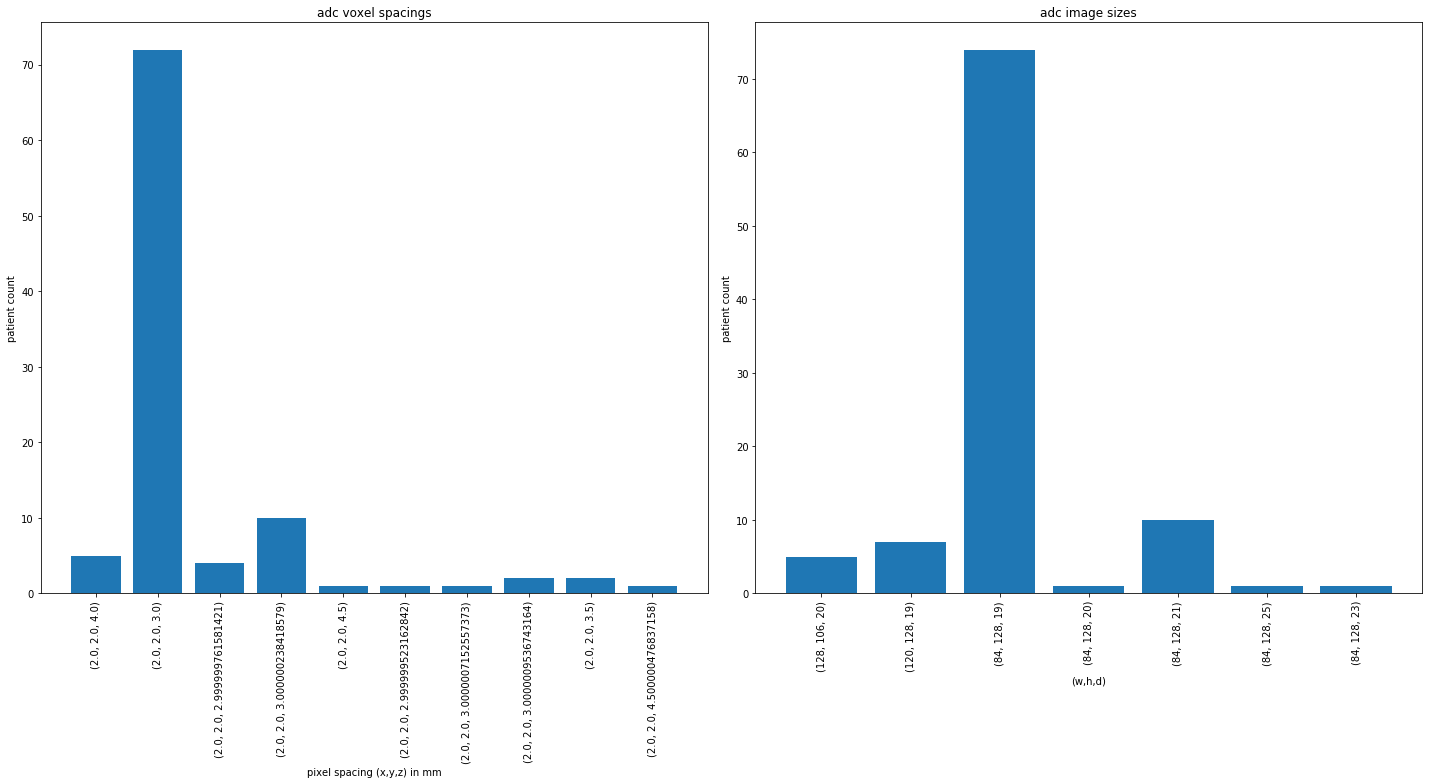

In [6]:
main()

FileNotFoundError: ignored

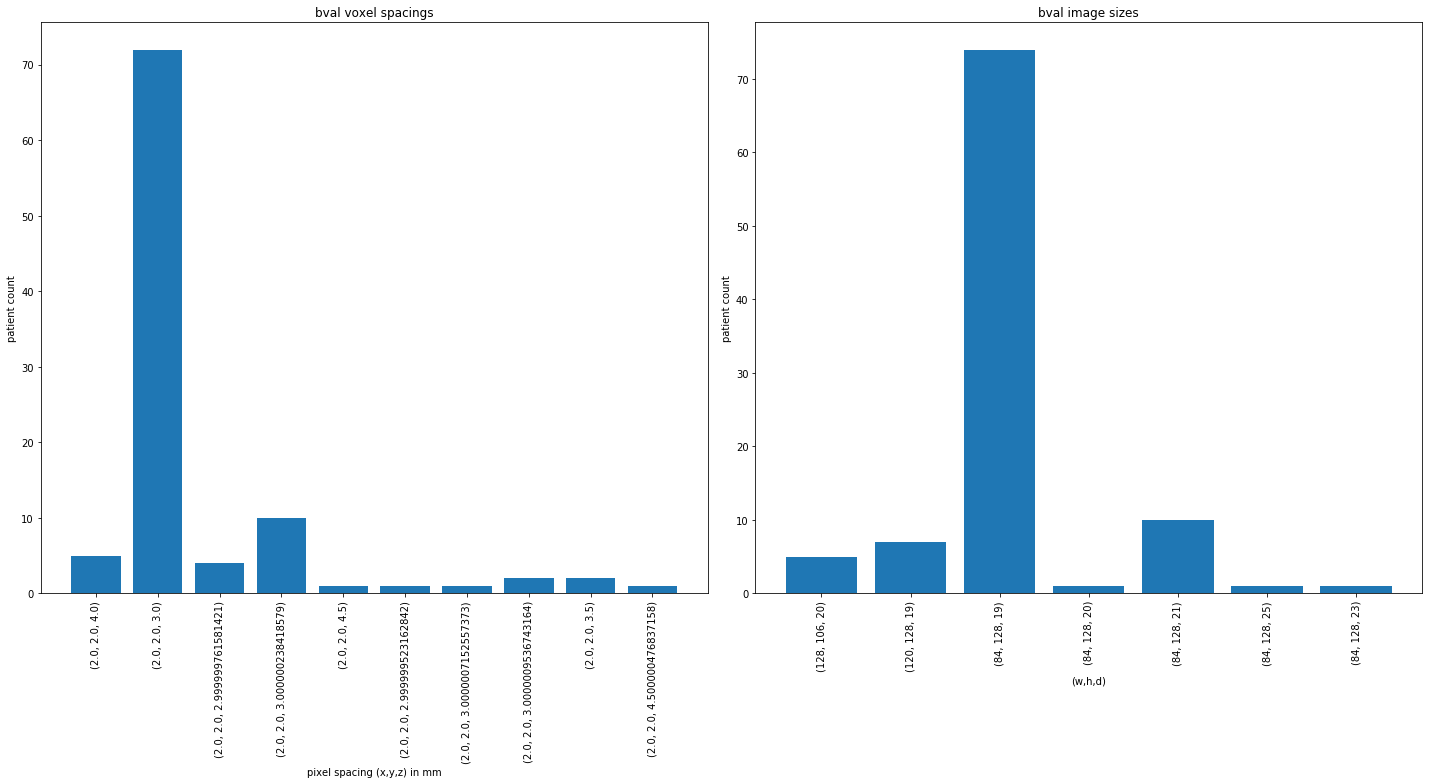

In [7]:
generate_charts('bval')

In [0]:
%cd /content/gdrive/My Drive/ProstrateX2-Challenge/ProstateX_temp/ProstateX-master/experimental/notebooks/jupyter

/content/gdrive/My Drive/ProstrateX2-Challenge/ProstateX_temp/ProstateX-master/experimental/notebooks/jupyter


In [0]:
!ls

gdrive	sample_data
